In [3]:
#deep fake detection
import tensorflow as tf
import keras 
from keras.layers import Activation, Dense
from keras.layers import Conv1D,Conv2D
from keras.models import Sequential
from keras import backend as k



successful


In [5]:
#gpu accelaration on online editors
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
#CODING THE GENERATIVE ADVERSARIAL  NETWORK
#oading the functions
#dense--> noise layer of the network
#conv2dtranspose--> it enalbes us to convolve and upsacale the image at the same time
#it is equivalent to upsampling2d followed by conv2d
#LeakyRelu-->avoids gardeint vainsh problem
#BatchNormalisation--> helps to normalise the covultion result
#reshape--> helps to convert 1D array to 3D



In [ ]:
#NOTES ON GANS
#, Minimax is a competition among Discriminator “D” and Generator “G”. “D” tries increment the
# possibility that accurately distinguishes true(real) and phoney (log D(x)), while “G” tries to decrease the possibility
# that D will forecast that its outputs seem to be counterfeit “log(1-D(G(z))”. In the aforementioned research paper, the
# GAN error rate estimated by calculation of loss can be noticed in equation 1 [4].
# 𝐺minD𝑚ax 𝑉(𝐷, 𝐺) = 𝐸x ~𝑝𝑑ata(𝑥)[𝑙ogD(𝑥)] + 𝐸𝐸𝐸𝐸~𝑝𝑝𝑧𝑧(𝑧𝑧)[𝑙𝑙𝑙𝑙𝑙𝑙(1 − 𝐷𝐷(𝐺𝐺(𝑧𝑧)))] (1)
# Where; G stands for Generator, D stands for Discriminator, Pdata(x) = real-world data distribution, P(z) = generator
# distribution, x = Pdata sample (x),z = a sample taken from P (z), D(x) denotes a discriminator network, G(z) denotes
# the generator network.

In [3]:
import glob
import time
import os 
import PIL
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
import imageio
from IPython import display
import tensorflow as tf


In [4]:
pip install imageio

  Obtaining dependency information for imageio from https://files.pythonhosted.org/packages/c7/b0/7b6c35b8636ed773325cdb6f5ac3cd36afba63d99e20ed59c521cf5018b4/imageio-2.31.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 4.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
#LAOD AND PREPARE THE DATA
(train_images,train_labels),(_,_) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
#train_images.shape[0],28,28,1 means 0--> upsampling 28x28--> size, 1 means --> greyscale for color value is 3(rgb)
train_images = (train_images-127.5)/127.5 #normalize between [-1,1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256
#batch and shuffle the data
train_dataset  = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BATCH_SIZE).batch(BATCH_SIZE)


In [24]:
#the generator

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))#7 rows , 7 coloumns and 256 channels)
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    # Conv2DTranspose(128,(5,5)) means output size is 128 and kernel size is (5,5)
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model


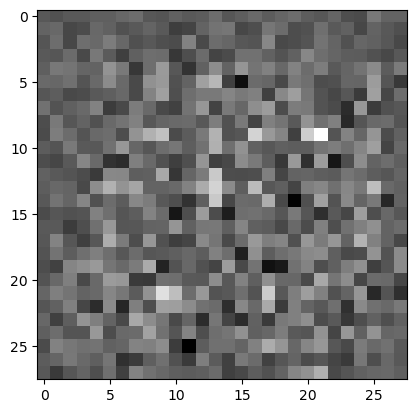

In [30]:
#plotting the summary and priniting the untrained image model
generator = make_generator_model()
noise = tf.random.normal([1,100])
generated_image = generator(noise,training = False)
plt.imshow(generated_image[0,:,:,0],cmap = 'gray')


In [36]:
# THE DISCRIMINATOR
def the_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64,(5,5)),strides = (2,2), padding = 'same',input_shape = [28,28,1])
    
    
    model.add(layers,LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128,(5,5)),strides = (2,2), padding = 'same')
    model.add(layers,LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Flatten())
    model.add(Dense(1))
    


In [38]:
#define loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)